In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import glob

# 读取LS4P中的部分数据进行合并，用于后续绘图

2021.10.05


## NJU LS4P_B

In [ ]:
# read mult NC files to select specfic var
NJU_path         = "/raid61/LS4P-TPEMIP/TPEMIP-NJU/"
multfiles_names  = glob.glob(NJU_path + "LS4P_B*/LS4P_STS*.nc")
xr_multfiles     = xr.open_mfdataset(multfiles_names, parallel = True)
pr_nju           = xr_multfiles['tas']
select_dict      = {} # 选定合适年月
time_year        = (pr_nju.time.dt.year >= 1991) # 时次相对较长，一开始使用1998年一年进行尝试
time_month       = (pr_nju.time.dt.month.isin([4,5,6,7,8])) # 时次相对较长，一开始使用1998年一年进行尝试
select_time      = (time_year & time_month)
select_dict['time'] = select_time
# wrtie dask nc files to single files
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
pr_nju.sel(select_dict).to_netcdf(path_out + "NJU_LS4P_B_t2m.nc")

## NJU LS4P_C

In [ ]:
# read mult NC files to select specfic var
NJU_path         = "/raid61/LS4P-TPEMIP/TPEMIP-NJU/"
multfiles_names  = glob.glob(NJU_path + "LS4P_C*/LS4P_STS*.nc")
xr_multfiles     = xr.open_mfdataset(multfiles_names, parallel = True)
pr_nju           = xr_multfiles['tas']
select_dict      = {} # 选定合适年月
time_year        = (pr_nju.time.dt.year >= 1991) # 时次相对较长，一开始使用1998年一年进行尝试
time_month       = (pr_nju.time.dt.month.isin([4,5,6,7,8])) # 时次相对较长，一开始使用1998年一年进行尝试
select_time      = (time_year & time_month)
select_dict['time'] = select_time
# wrtie dask nc files to single files
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
pr_nju.sel(select_dict).to_netcdf(path_out + "NJU_LS4P_C_t2m.nc")

## NJU Output-E
- remark： 1991-2014 年， 缺少2015年

In [2]:
# read mult NC files to select specfic var
NJU_path         = "/raid61/LS4P-TPEMIP/TPEMIP-NJU/"
multfiles_names  = glob.glob(NJU_path + "Output-E*/LS4P_STS*.nc")
xr_multfiles     = xr.open_mfdataset(multfiles_names, parallel = True)
pr_nju           = xr_multfiles['tas']
select_dict      = {} # 选定合适年月
time_year        = (pr_nju.time.dt.year >= 1991) # 时次相对较长，一开始使用1998年一年进行尝试
time_month       = (pr_nju.time.dt.month.isin([4,5,6,7,8])) # 时次相对较长，一开始使用1998年一年进行尝试
select_time      = (time_year & time_month)
select_dict['time'] = select_time
# wrtie dask nc files to single files
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
pr_nju.sel(select_dict).to_netcdf(path_out + "NJU_Output-E_t2m.nc")

## SYS
wrf后处理，需要将累计降水处理为逐日的降水

### 从每个wrf文件之中读取需要的变量

In [2]:
# read mult NC files to select specfic var
# sys文件太大，先使用cdo处理出来一批临时文件，再将临时文件进行合并
import os
out_path                   = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/"  # 存放sys的临时文件
os.system("mkdir -p " + out_path)
files_in_list = []
files_out_list = []
for single_year in range(1991, 2016):
    SYS_path                  = "/raid61/LS4P-TPEMIP/LS4P_TPEMIP_RCM/WRF4.2.1/wrfout-" + str(single_year) + "/"
    multfiles_names       = glob.glob(SYS_path + "LS4P_WRF4.2.1_TPEMIP_Phase1_6hr_*.nc")
    files_in_list.append(multfiles_names)
    files_out_list.append(out_path + str(single_year) + ".nc")

def write_temp_nc(files_in, files_out):
    print("----- dealing " + files_out)
    ds_temp                   = xr.open_mfdataset(files_in[:], combine  = "nested", concat_dim = "Time")['T2']
    ds_temp.to_netcdf(files_out)

In [3]:
from multiprocessing import Pool
import os, time, random
print('Parent process %s.' % os.getpid())
p = Pool(4)
for i in range(len(files_in_list)):
    p.apply_async(write_temp_nc, args=( (files_in_list[i], files_out_list[i]) ) )
print('Waiting for all subprocesses done...')
p.close()
p.join()
print('All subprocesses done.')

Parent process 23691.
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1992.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1991.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1993.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1994.nc
Waiting for all subprocesses done...
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1995.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1996.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1997.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1998.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1999.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/2000.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/2001.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/2002.nc
----- dealing /raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/2003.nc
----- dealing /raid61/LS4P-TPEM

### 合并所有文件到一个dataset

In [2]:
# 2021.12.13 需要添加XLONG XLAT的属性来识别网格，用于后续的cdo的插值
sys_xlatlong_temp = xr.open_dataset("/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/1991.nc")

In [3]:
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
pr_sys = xr.open_mfdataset("/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/sys_tempfiles/????.nc", combine  = "nested", concat_dim = "Time")
daily_xtime_pd = pd.to_datetime(pr_sys.XTIME.values)
XTIME_daily    = xr.DataArray(daily_xtime_pd, name='Time',dims='Time')
pr_sys  = pr_sys.rename({"XTIME":"Time"}).assign_coords( {"Time":XTIME_daily} )
select_dict      = {} # 选定合适年月
time_year        = (pr_sys.Time.dt.year >= 1991) # 时次相对较长，一开始使用1998年一年进行尝试
time_month       = (pr_sys.Time.dt.month.isin([4,5,6,7,8])) # 时次相对较长，一开始使用1998年一年进行尝试
select_time      = (time_year & time_month)
select_dict['Time'] = select_time
# 冗长的一步，在最后输出前，先将multcoords赋值正确，避免后续维度在进行计算时丢失
pre_temp = pr_sys.sel(select_dict)
pre_temp = pre_temp.assign_coords({"south_north":pre_temp.south_north, "west_east":pre_temp.west_east,"XLAT":pre_temp.XLAT, "XLONG":pre_temp.XLONG})
pre_temp.XLAT.attrs = sys_xlatlong_temp.XLAT.attrs
pre_temp.XLONG.attrs = sys_xlatlong_temp.XLONG.attrs
# pre_temp.to_netcdf(path_out + "SYS_t2m.nc")

因为此前读出的数据 cdo 处理起来较慢

问题可能处在 XLAT XLONG 是3D变量，所以耽误很多时间在权重的计算上

从头开始建立WRF类似的multdimensional coordinates的DataArray，将XLAT XLONG处理为2D变量并assign

In [6]:
sys_t2 = pre_temp['T2'].values

In [71]:
da_sys_t2 = xr.DataArray(sys_t2, dims = ['Time', "south_north",  "west_east"], name = 'T2')
da_sys_t2_time = pre_temp.Time
da_sys_t2_xlat   = pre_temp.XLAT[0]
da_sys_t2_xlong= pre_temp.XLONG[0]
add_coords = { "XLONG" : (("south_north",  "west_east") , da_sys_t2_xlong ), "XLAT" : (("south_north",  "west_east") , da_sys_t2_xlat),\
"Time":da_sys_t2_time }
da_sys_t2 = da_sys_t2.assign_coords(add_coords)
da_sys_t2.XLAT.attrs = da_sys_t2_xlat.attrs
da_sys_t2.XLONG.attrs = da_sys_t2_xlong.attrs
da_sys_t2.encoding['coordinates'] = 'Time XLAT XLONG'
da_sys_t2 = da_sys_t2.assign_attrs({'corrdinates'  :  'Time XLAT XLONG'})

In [74]:
da_sys_t2.to_netcdf(path_out + "SYS_t2m.nc")

## Yang-ZhouX

In [2]:
path_YZX               = "/raid61/LS4P-TPEMIP/LS4P_Yang-ZhouX/sf/dailym&monthlym/"
filename_T2    = "T2_ls4p_itpcasWRF_TPEMIP_dailym_*"
origin_ds  = xr.open_mfdataset(path_YZX + filename_T2, combine  = "nested", concat_dim = "XTIME")
daily_xtime_pd = pd.to_datetime(origin_ds.XTIME.values)
XTIME_daily    = xr.DataArray(daily_xtime_pd, name='Time',dims='Time')
origin_ds  = origin_ds.rename({"XTIME":"Time"}).assign_coords( {"Time":XTIME_daily} )

In [3]:
select_dict      = {} # 选定合适年月
timesize = []
# for iyear in range(1991, 2016):
time_year        = (origin_ds.Time.dt.year >= 1991) # 时次相对较长，一开始使用1998年一年进行尝试
time_month       = (origin_ds.Time.dt.month.isin([4,5,6,7,8])) # 时次相对较长，一开始使用1998年一年进行尝试
select_time      = (time_year & time_month)
select_dict['Time'] = select_time
sel_yzx_temp = origin_ds.sel(select_dict)

In [9]:
yzx_t2 = sel_yzx_temp.T2 # 仅输出 T2 变量就足够，DS会出现坐标的歧义

In [8]:
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
# sel_yzx_temp.to_netcdf(path_out + "Yang-ZhouX_t2m.nc")
yzx_t2.to_netcdf(path_out + "Yang-ZhouX_t2m.nc")

## YSU数据
YSU数据添补充了经纬度坐标，添加时间维度以及补充的latlon文件中的维度；

In [64]:
path_in = "/raid61/LS4P-TPEMIP/TPEMIP-YSU/????/EAPL_LS4P_????_daily_d01.nc"
test = xr.open_mfdataset(path_in, concat_dim = "day", combine = "nested")
xlat_xlong = xr.open_dataset("/raid61/LS4P-TPEMIP/TPEMIP-YSU/LS4P_YSU_EAPl_LATLON.nc")

In [65]:
time = pd.date_range("1991-01-01","2015-12-31", freq="D")
time_da = xr.DataArray(time, name = "time", dims = "time")
correct_time_3825 = time_da.sel(time = time_da.dt.month.isin([4,5,6,7,8]))
pr_temp = test['t2m'].rename({"day":"time"}).assign_coords({"time":correct_time_3825})
# 添加multdimensional coords，通过字典来进行添加
add_coords = { "XLONG" : (("lat","lon") , xlat_xlong.XLONG[0,:,:] ), "XLAT" : (("lat","lon") , xlat_xlong.XLAT[0,:,:] ) }
pr_temp = pr_temp.assign_coords( add_coords )

In [66]:
# 2021.12.13 需要添加XLONG XLAT的属性来识别网格，用于后续的cdo的插值
pr_temp.XLONG.attrs = xlat_xlong.XLONG.attrs
pr_temp.XLAT.attrs = xlat_xlong.XLAT.attrs
# 重新添加coords名称，便于cdo进行插值，否则每个时次会单独计算插值的权重
# pr_temp.coordinate = 'XLONG XLAT time'
pr_temp = pr_temp.assign_attrs({"coordinate":"time XLONG XLAT", "coordinates":"time XLONG XLAT"})

In [69]:
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
pr_temp.to_netcdf(path_out + "YSU_t2m.nc")

## JAMSTEC_WRF数据
缺少4月

t2m使用了zlib='True'的encoding，在写出的时候显著地影响了性能；最后去除

In [3]:
path_in = "/raid61/LS4P-TPEMIP/JAMSTEC_WRF_1991-2015/daily_2D/ncfile/????/t2m_JAMSTECWRF_TPEMIP_day_00z0105????-00z3108????.nc"
t2m = xr.open_mfdataset(path_in)['t2m']
# path_in = "/raid61/LS4P-TPEMIP/JAMSTEC_WRF_1991-2015/daily_2D/ncfile/????/mppre_JAMSTECWRF_TPEMIP_day_00z0105????-00z3108????.nc"
# mppre = xr.open_mfdataset(path_in)['mppre']
# (mppre+conpre).mean(dim = 'time').plot.contourf(vmin = 0, vmax = 1, cmap = "gist_ncar")

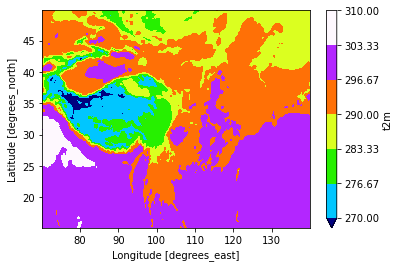

In [3]:
t2m.mean(dim = 'time').plot.contourf(vmin = 270, vmax = 310, cmap = "gist_ncar")

In [4]:
t2m.encoding['coordinates'] = 'time lat lon'
t2m['lon'] = t2m['lon'].assign_attrs({"axis" : "X" })
t2m['lat'] = t2m['lat'].assign_attrs({"axis" : "Y" })

In [9]:
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
t2m.encoding['zlib'] = False
t2m.to_netcdf(path_out + "JAMSTECWRF_t2m.nc")

## CWRF
数据暂时只有平均态，找到了逐月的多年平均，但是是从1980-2016年，相比原本的时段更长

In [21]:
# # path_in = "/raid61/LS4P-TPEMIP/TPEMIP-CWRF/Task1/daily/pr_LS4P_CWRF_Task1_day_00z01052003-21z30062003.nc"
# # path_in = "/raid61/LS4P-TPEMIP/TPEMIP-CWRF/Task2/" + "pr_LS4P_CWRF_Task2_jun_00z01011980-21z31122016.nc"
path_in = "/raid61/LS4P-TPEMIP/TPEMIP-CWRF/Task2/" + "t2m_LS4P_CWRF_Task2_mon_00z01011980-21z31122016.nc"
test  = xr.open_dataset(path_in)
path_out         = "/raid61/LS4P-TPEMIP/TEMP_DATA/t2m/"
test['t2m'].to_netcdf(path_out + "CWRF_t2m.nc")